# All

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
!pwd

/content/drive/MyDrive


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import pathlib
from glob import glob
import pickle
from scipy.io import loadmat, savemat
import os
import numpy as np
import pandas as pd
import scipy
import librosa
import cv2

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

print(tf.__version__)

2.9.2


In [ ]:
loc = "Xy_filtereddata/"
subject = "A01.pkl"
location = loc+subject

In [ ]:
f = open(location, 'rb')
savedict= pickle.load(f)
train_data=savedict['Xtrain']
test_data=savedict['Xtest']
train_labels=savedict['ytrain']
test_labels=savedict['ytest']

num_classes = 4
train_labels = train_labels.reshape(-1, 1) - 1
test_labels = test_labels.reshape(-1, 1) - 1
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes)
print(train_data.shape)
print(train_labels.shape)

(288, 22, 875)
(288, 4)


In [ ]:
# The signal is band-pass filtered from 8 - 30 Hz, but the sampling rate is 250 Hz. Hence, downsampling the signals
train_data = scipy.signal.decimate(train_data, 4)
test_data = scipy.signal.decimate(test_data, 4)

In [ ]:
_, __, spec_train = scipy.signal.spectrogram(train_data, fs = 62.5, noverlap = 50, nperseg = 60, nfft = 60)
_, __, spec_test = scipy.signal.spectrogram(test_data, fs = 62.5, noverlap = 50, nperseg = 60, nfft = 60)
del _
del __

In [ ]:
spec_train.shape

(288, 22, 31, 16)

In [ ]:
# Only taking three channels
temp = np.zeros([288, 124, 88, 3])
for s in range(spec_train.shape[0]):
  i = 0
  for c in [7, 9, 11]:
    temp[s, :, :, i] = cv2.resize(spec_train[s, c, :, :], dsize=(88, 124), interpolation = cv2.INTER_AREA)
    i = i+ 1
spec_train = temp.copy()

for s in range(spec_test.shape[0]):
  i = 0
  for c in [7, 9, 11]:
    temp[s, :, :, i] = cv2.resize(spec_test[s, c, :, :], dsize=(88, 124), interpolation = cv2.INTER_AREA)
    i = i + 1
spec_test = temp.copy()
del temp

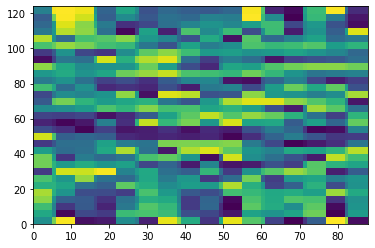

In [ ]:
spec_train = tf.keras.utils.normalize(spec_train)
spec_test = tf.keras.utils.normalize(spec_test)
plt.pcolormesh(spec_test[0, :, :, 0])

## ML

In [ ]:
from keras.applications import InceptionV3, ResNet50
IV3 = ResNet50(include_top= False, weights='imagenet', input_shape = (124, 88, 3))

In [ ]:
IV3.trainable = False
i = 0
for layer in IV3.layers:
  if i>500:
    break
  layer.trainable = False
  i = i + 1

pd.set_option('max_colwidth', -1)
layers = [(layer, layer.name, layer.trainable) for layer in IV3.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  if __name__ == '__main__':


,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x7efed45eba50>,input_9,False
1,<keras.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x7efed5373b10>,conv1_pad,False
2,<keras.layers.convolutional.conv2d.Conv2D object at 0x7efed5373c10>,conv1_conv,False
3,<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7efee7ce8e90>,conv1_bn,False
4,<keras.layers.core.activation.Activation object at 0x7efed45d6810>,conv1_relu,False
...,...,...,...
170,<keras.layers.core.activation.Activation object at 0x7eff0c0e2b50>,conv5_block3_2_relu,False
171,<keras.layers.convolutional.conv2d.Conv2D object at 0x7efe6a0fa250>,conv5_block3_3_conv,False
172,<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7efee6b95650>,conv5_block3_3_bn,False
173,<keras.layers.merging.add.Add object at 0x7efed41c3e10>,conv5_block3_add,False


In [ ]:
pd.set_option('max_colwidth', -1)
layers = [(layer, layer.name, layer.trainable) for layer in IV3.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x7efed45eba50>,input_9,False
1,<keras.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x7efed5373b10>,conv1_pad,False
2,<keras.layers.convolutional.conv2d.Conv2D object at 0x7efed5373c10>,conv1_conv,False
3,<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7efee7ce8e90>,conv1_bn,False
4,<keras.layers.core.activation.Activation object at 0x7efed45d6810>,conv1_relu,False
...,...,...,...
170,<keras.layers.core.activation.Activation object at 0x7eff0c0e2b50>,conv5_block3_2_relu,False
171,<keras.layers.convolutional.conv2d.Conv2D object at 0x7efe6a0fa250>,conv5_block3_3_conv,False
172,<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7efee6b95650>,conv5_block3_3_bn,False
173,<keras.layers.merging.add.Add object at 0x7efed41c3e10>,conv5_block3_add,False


In [ ]:
num_classes = 4
model1 = keras.models.Sequential()
model1.add(IV3)
model1.add(keras.layers.Flatten())
model1.add(keras.layers.Dense(512, activation='relu'))
model1.add(keras.layers.Dropout(0.3))
model1.add(keras.layers.Dense(512, activation='relu'))
model1.add(keras.layers.Dropout(0.3))
model1.add(keras.layers.Dense(num_classes, activation='softmax'))
model1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 3, 2048)        23587712  
                                                                 
 flatten_8 (Flatten)         (None, 24576)             0         
                                                                 
 dense_24 (Dense)            (None, 512)               12583424  
                                                                 
 dropout_16 (Dropout)        (None, 512)               0         
                                                                 
 dense_25 (Dense)            (None, 512)               262656    
                                                                 
 dropout_17 (Dropout)        (None, 512)               0         
                                                                 
 dense_26 (Dense)            (None, 4)                

In [ ]:
callbacks = [tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.01,
    patience=60,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)]
model1.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(lr=2e-5),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model1.fit(spec_train, train_labels, epochs=1000, validation_split = 0.2, callbacks = callbacks, verbose=1, batch_size = 288)

Epoch 1/1000
1/1 [==============================] - 5s 5s/step - loss: 0.7871 - accuracy: 0.2261 - val_loss: 0.7217 - val_accuracy: 0.2414
Epoch 2/1000
1/1 [==============================] - 0s 417ms/step - loss: 0.7461 - accuracy: 0.2435 - val_loss: 0.6999 - val_accuracy: 0.2414
Epoch 3/1000
1/1 [==============================] - 0s 395ms/step - loss: 0.7173 - accuracy: 0.2478 - val_loss: 0.6798 - val_accuracy: 0.2414
Epoch 4/1000
1/1 [==============================] - 0s 397ms/step - loss: 0.7045 - accuracy: 0.2609 - val_loss: 0.6614 - val_accuracy: 0.2414
Epoch 5/1000
1/1 [==============================] - 0s 397ms/step - loss: 0.6910 - accuracy: 0.2043 - val_loss: 0.6452 - val_accuracy: 0.2414
Epoch 6/1000
1/1 [==============================] - 0s 403ms/step - loss: 0.6726 - accuracy: 0.2304 - val_loss: 0.6310 - val_accuracy: 0.2414
Epoch 7/1000
1/1 [==============================] - 0s 394ms/step - loss: 0.6451 - accuracy: 0.2174 - val_loss: 0.6187 - val_accuracy: 0.2414
Epoch 8/1

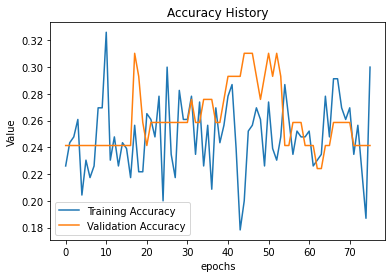

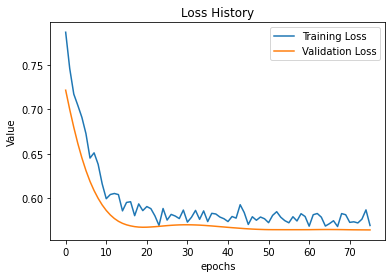

Initial Training accuracy:  0.22608695924282074
Best Training accuracy:  0.32608696818351746
Initial Training loss:  0.787082850933075
Best Training loss:  0.5991814136505127
Initial Validation accuracy:  0.24137930572032928
Best Validation accuracy:  0.3103448152542114
Initial Validation loss:  0.721675455570221
Best Validation loss:  0.5676809549331665


In [ ]:
#Plotting model history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.title('Accuracy History')
plt.ylabel('Value')
plt.xlabel('epochs')
plt.show()

#Plotting model history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training Loss', 'Validation Loss'])
plt.title('Loss History')
plt.ylabel('Value')
plt.xlabel('epochs')
plt.show()

print("Initial Training accuracy: ", history.history['accuracy'][0])
print("Best Training accuracy: ", np.max(history.history['accuracy']))
print("Initial Training loss: ", history.history['loss'][0])
print("Best Training loss: ", history.history['loss'][np.argmax(history.history['accuracy'])])
print("Initial Validation accuracy: ", history.history['val_accuracy'][0])
print("Best Validation accuracy: ", np.max(history.history['val_accuracy']))
print("Initial Validation loss: ", history.history['val_loss'][0])
print("Best Validation loss: ", history.history['val_loss'][np.argmax(history.history['val_accuracy'])])